In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lyrics/lyrics.csv
/kaggle/input/poetry-foundation-poems/PoetryFoundationData.csv
/kaggle/input/song-font/AovelSansRounded-rdDL.ttf
/kaggle/input/song-font/info.txt
/kaggle/input/song-lyrics/Songs.csv
/kaggle/input/song-background/download.jpeg


In [3]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string, os
import nltk
import re
import keras
import random
import io
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adamax
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont
import warnings
warnings.filterwarnings("ignore")
import joblib

In [5]:
data = pd.read_csv("/kaggle/input/song-lyrics/Songs.csv")
data

,Artist,Title,Lyrics
0,Taylor Swift,cardigan,"Vintage tee, brand new phone\nHigh heels on co..."
1,Taylor Swift,exile,"I can see you standing, honey\nWith his arms a..."
2,Taylor Swift,Lover,We could leave the Christmas lights up 'til Ja...
3,Taylor Swift,the 1,"I'm doing good, I'm on some new shit\nBeen say..."
4,Taylor Swift,Look What You Made Me Do,I don't like your little games\nDon't like you...
...,...,...,...
740,George Michael,The First Time Ever I Saw Your Face,The first time ever I saw your face\nI thought...
741,George Michael,Waiting For That Day/You Can’t Always Get What...,Now every day I see you in some other face\nTh...
742,George Michael,Shoot the Dog,"GTI, Hot Shot\nHe parks it there, just to piss..."
743,George Michael,Star People,"Maybe your mama gave you up, boy\nMaybe your d..."


In [6]:
#Printing the names of artists in the lyrics data
print("Artists in the data:\n",data.Artist.value_counts())

Artists in the data:
 Taylor Swift          50
David Bowie           50
Billy Joel            50
Eric Clapton          50
Billie Eilish         50
Leonard Cohen         50
Bruce Springsteen     40
The Beatles           35
Ray LaMontagne        30
Elton John            30
Queen                 30
Frank Sinatra         30
John Denver           30
Bryan Adams           30
​twenty one pilots    30
Nat King Cole         30
Lana Del Rey          30
Vance Joy             30
George Michael        30
Bob Dylan             20
Ed Sheeran            20
Name: Artist, dtype: int64


In [7]:
#Printing the size of dataset
print("Size of Dataset:",data.shape)

Size of Dataset: (745, 3)


In [8]:

#Adding a column of numbers of Characters,words and sentences in each msg
data["No_of_Characters"] = data["Lyrics"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["Lyrics"]), axis=1).apply(len)
data["No_of_Lines"] = data["Lyrics"].str.split('\n').apply(len)
data.head()

,Artist,Title,Lyrics,No_of_Characters,No_of_Words,No_of_Lines
0,Taylor Swift,cardigan,"Vintage tee, brand new phone\nHigh heels on co...",1723,370,63
1,Taylor Swift,exile,"I can see you standing, honey\nWith his arms a...",2345,546,65
2,Taylor Swift,Lover,We could leave the Christmas lights up 'til Ja...,1306,315,37
3,Taylor Swift,the 1,"I'm doing good, I'm on some new shit\nBeen say...",1632,360,53
4,Taylor Swift,Look What You Made Me Do,I don't like your little games\nDon't like you...,2591,631,78


In [9]:
data.describe()

,No_of_Characters,No_of_Words,No_of_Lines
count,745.000000,745.000000,745.000000
mean,1403.347651,319.400000,46.277852
std,666.721467,156.163646,21.180531
min,1.000000,1.000000,1.000000
25%,946.000000,215.000000,33.000000
50%,1289.000000,291.000000,44.000000
75%,1714.000000,389.000000,56.000000
max,7267.000000,1652.000000,224.000000


<Figure size 1500x1500 with 0 Axes>

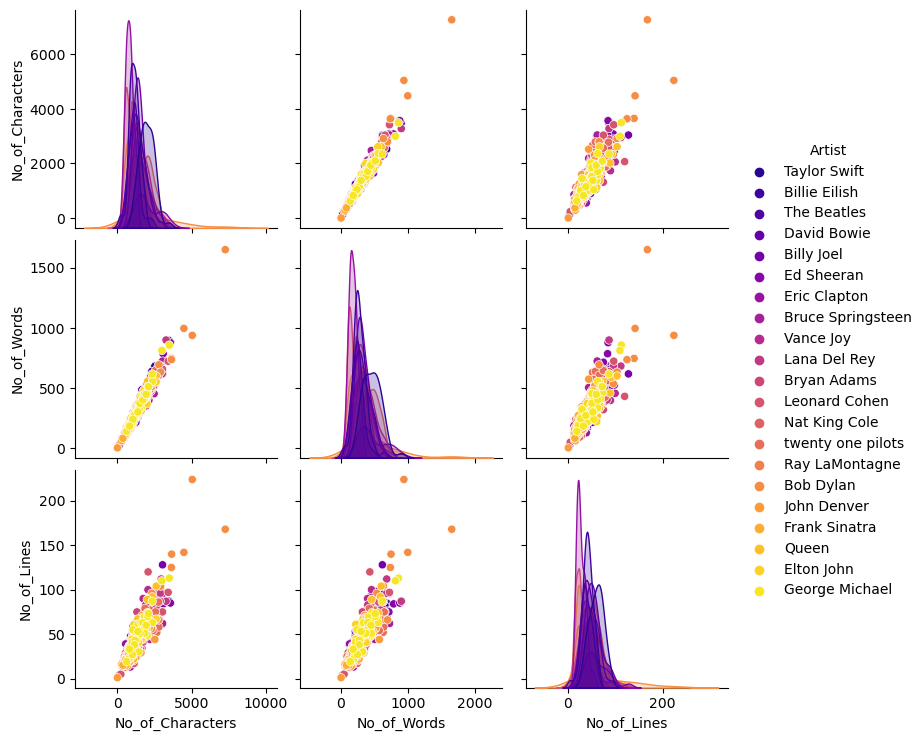

In [10]:
#Plotting the comparative song lengths for various artists
plt.figure(figsize=(15,15))
ax = sns.pairplot(data, hue="Artist", palette="plasma")

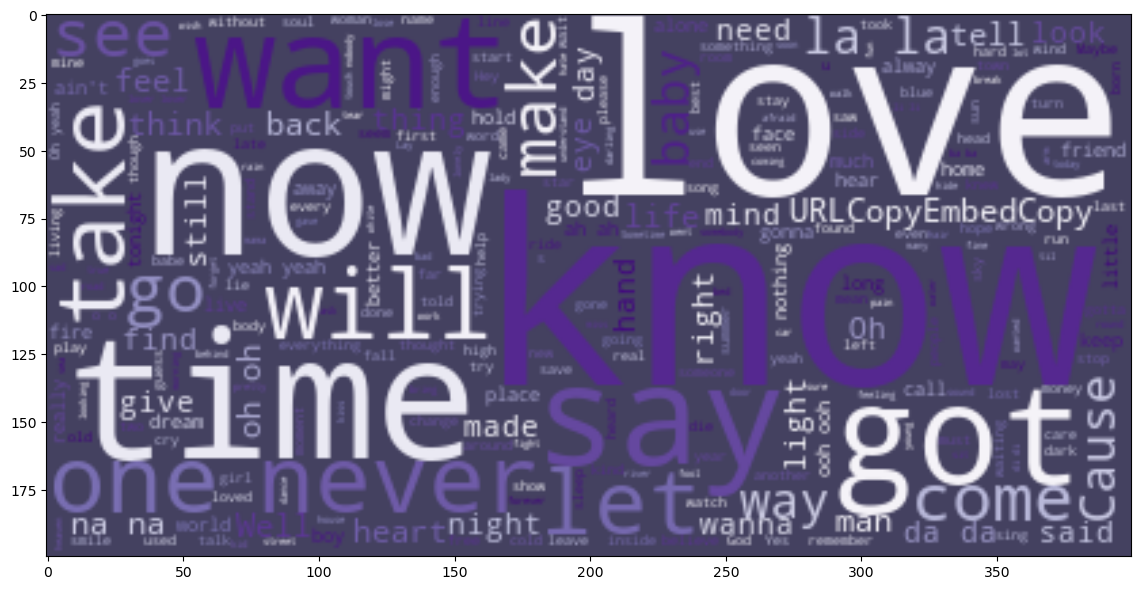

In [11]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="#444160",colormap="Purples", max_words=500).generate(" ".join(data["Lyrics"]))
plt.figure(figsize=(14,14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

In [11]:
#def My_song(song):
    #img = Image.open("/kaggle/input/song-background/download.jpeg")
    #Text_on_image = ImageDraw.Draw(img)
    #myFont = ImageFont.truetype("/kaggle/input/song-font/AovelSansRounded-rdDL.ttf", 45)
    #Text_on_image.text((620,90), song, font=myFont, fill =(23, 32, 42))
    #return img


#Having a look at the first 500 charachters of a random song lyrics
#My_song(data.Lyrics[12][:500]) 

In [12]:
#Creating a corpus by lining up all lyrics
Corpus = ''
for listitem in data.Lyrics:
    Corpus += listitem
    
#Converting all alphabets to lowercase
Corpus = Corpus.lower()
print("Number of unique characters : ", len(set(Corpus)))

Number of unique characters :  92


In [13]:
#number of unique characters shows we need to remove some foreign language scripts
#to see all the unique characters
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\n', ' ', '!', '"', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}', '~', '©', 'à', 'á', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'ñ', 'ó', 'ö', 'ü', 'ŏ', 'е', 'ا', 'س', 'ل', 'م', 'و', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”', '…', '\u205f', '\ufeff']


In [14]:
#removing unwanted characters
remove_char = ['{', '}', '~', '©', 'à', 'á', 'ã', 'ä', 'ç', 'è', 'é', 'ê', 'ë', 'í', 'ñ', 'ó', 'ö', 'ü', 'ŏ',
             'е', 'ا', 'س', 'ل', 'م', 'و', '\u2005', '\u200a', '\u200b', '–', '—', '‘', '’', '‚', '“', '”', 
             '…', '\u205f', '\ufeff', '!', '&', '(', ')', '*', '-',  '/', ]

for symbol in remove_char:
    Corpus = Corpus.replace(symbol, " ")
    
print("Unique characters are : ", sorted(set(Corpus)))
print("Number of unique characters are : ", len(set(Corpus)))

Unique characters are :  ['\n', ' ', '"', "'", ',', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of unique characters are :  47


In [15]:
# Storing all the unique characters present in my corpus to bult a mapping dic. 
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 1045494
Number of unique characters: 47


In [16]:
import pickle

# save dictionary to person_data.pkl file
with open('mapping.pkl', 'wb') as fp:
    pickle.dump(mapping, fp)
    print('mapping saved successfully to file')
    

# save dictionary to person_data.pkl file
with open('reverse_mapping.pkl', 'wb') as fp:
    pickle.dump(reverse_mapping, fp)
    print('mapping saved successfully to file')

mapping saved successfully to file
mapping saved successfully to file


In [17]:
#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])
    
    
L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 1045454


In [20]:
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)

# one hot encode the output variable
y = np_utils.to_categorical(targets)

In [22]:
#model building
#initialising model
model = Sequential()
#Adding layers
model.add(Bidirectional(LSTM(256, input_shape=(X.shape[1], X.shape[2]))))
model.add(Dense(y.shape[1], activation='softmax'))
#Compiling the model for training  
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

#Model's Summary               
# model.summary()


In [23]:
#Training the Model
history = model.fit(X, y, batch_size=128, epochs=100)

Epoch 1/100
8168/8168 [==============================] - 102s 12ms/step - loss: 2.5270
Epoch 2/100
8168/8168 [==============================] - 95s 12ms/step - loss: 2.1635
Epoch 3/100
8168/8168 [==============================] - 95s 12ms/step - loss: 1.9877
Epoch 4/100
8168/8168 [==============================] - 95s 12ms/step - loss: 1.8785
Epoch 5/100
8168/8168 [==============================] - 95s 12ms/step - loss: 1.8053
Epoch 6/100
8168/8168 [==============================] - 95s 12ms/step - loss: 1.7390
Epoch 7/100
8168/8168 [==============================] - 95s 12ms/step - loss: 1.7032
Epoch 8/100
8168/8168 [==============================] - 95s 12ms/step - loss: 1.6747
Epoch 9/100
8168/8168 [==============================] - 95s 12ms/step - loss: 1.6422
Epoch 10/100
8168/8168 [==============================] - 95s 12ms/step - loss: 1.6156
Epoch 11/100
8168/8168 [==============================] - 95s 12ms/step - loss: 1.6003
Epoch 12/100
8168/8168 [===========================

In [24]:
import tensorflow as tf

tf.__version__

'2.9.2'

In [25]:
model.save('model_lyrics.h5')

In [26]:
filename = 'lyrics-final.pkl'
joblib.dump(model, filename)

['lyrics-final.pkl']

In [21]:
# from keras.models import load_model
# #To be used later; I am saving the model 
# model.save("Lyrics_Generator.h5")

[Text(0.5, 0, 'Epochs')]

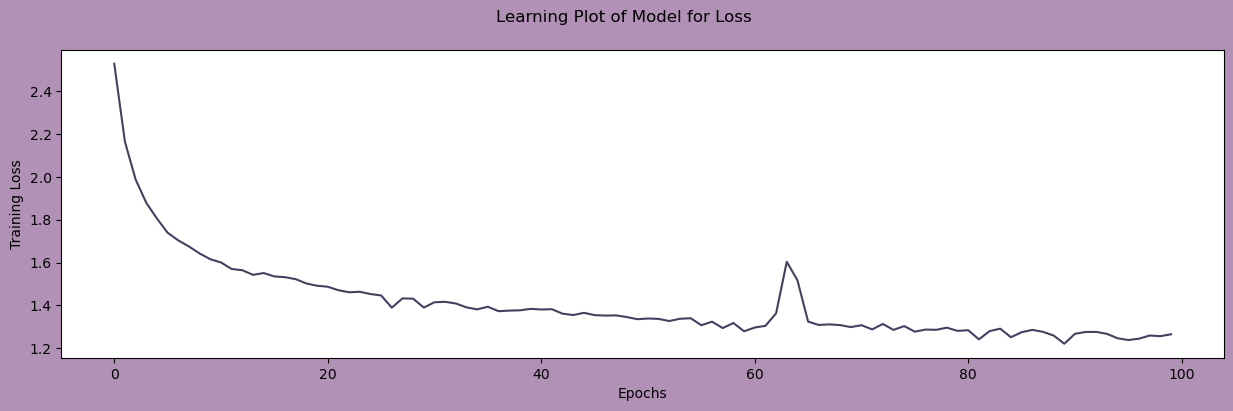

In [27]:
history_df = pd.DataFrame(history.history)
#Plotting the learnings 

fig = plt.figure(figsize=(15,4), facecolor="#B291B6")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

In [29]:
#generating a song
def Lyrics_Generator(starter,Ch_count): #,temperature=1.0):
    generated= ""
    starter = starter 
    global seed
    seed=[mapping[char] for char in starter]
    generated += starter 
    # Generating new text of given length
    for i in range(Ch_count):

        seed=[mapping[char] for char in starter]
        x_pred = np.reshape(seed, (1, len(seed), 1))
        x_pred = x_pred/ float(L_symb)
        prediction = model.predict(x_pred, verbose=0)[0]  
        # Getting the index of the next most probable index
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / 1.0 
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, prediction, 1)
        index = np.argmax(prediction)
        next_char = reverse_mapping[index]  
        # Generating new text
        generated += next_char
        starter = starter[1:] + next_char
       
    return generated

In [33]:
#Generating a song from the model
song_1 = Lyrics_Generator("we were both young", 400)
#Let's have a look at the song
print(song_1)

we were both young alone

i was always a care
baby, i gotta gave my baby
i was blrngete it something sooe
and the world is all the way
you know i love you
i don't know what i was b sroakg strersin' she said
"say good you gadle something savinga oo the street
i don't know what i was b sroakg strersin' she said
"say good you gadle something savinga oo the street
i don't know what i was b sroakg strersin' she said
"sa
